In [17]:
import xarray as xr
import numpy as np
import glob
import os
from xarray.coding.times import CFDatetimeCoder
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [18]:
time_coder = CFDatetimeCoder(use_cftime=True)
mine = xr.open_mfdataset(glob.glob(f"./processed/NorESM2-LM_ssp126_r1i1p1f1.nc"), decode_times=time_coder, combine='by_coords')
inputs = xr.open_mfdataset(glob.glob(f"./dataset/train_val/inputs_ssp126.nc"), decode_times=time_coder, combine='by_coords')
outputs = xr.open_mfdataset(glob.glob(f"./dataset/train_val/outputs_ssp126.nc"), decode_times=time_coder, combine='by_coords')

In [19]:
outputs

<xarray.Dataset> Size: 24MB
Dimensions:                    (member: 1, time: 86, lat: 96, lon: 144)
Coordinates:
  * member                     (member) int64 8B 1
  * time                       (time) int64 688B 2015 2016 2017 ... 2099 2100
  * lat                        (lat) float64 768B -90.0 -88.11 ... 88.11 90.0
  * lon                        (lon) float64 1kB 0.0 2.5 5.0 ... 355.0 357.5
    quantile                   float64 8B ...
Data variables:
    diurnal_temperature_range  (member, time, lat, lon) float32 5MB dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    tas                        (member, time, lat, lon) float32 5MB dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    pr                         (member, time, lat, lon) float32 5MB dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    pr90                       (member, time, lat, lon) float64 10MB dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>

In [23]:
tas = outputs['tas']

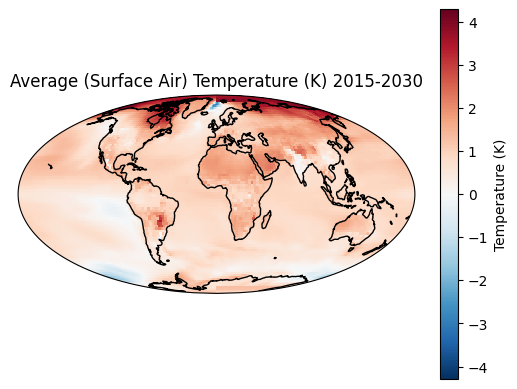

In [26]:
tas.sel(time=slice('2015', '2030')).mean('time').plot(
    transform=ccrs.PlateCarree(),  # Projection the data is stored in
    subplot_kws={"projection": ccrs.Mollweide()},  # Projection to plot onto
    cbar_kwargs={'label': 'Temperature (K)'}  # Colorbar label
)

plt.title('Average (Surface Air) Temperature (K) 2015-2030')
plt.gca().coastlines()  # Add coastlines to the map
plt.show()